---

# Resampling 10 Years of Daily Data

---


In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
df = pd.read_csv('data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(2335, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-06,28.25,28.450001,28.040001,28.270000,19.368675,70147800
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


---

#### We can, of course, plot a basic ohlc or candlestick plot:

'0.12.10b0'

c:\Users\huzhe\.conda\envs\py310\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


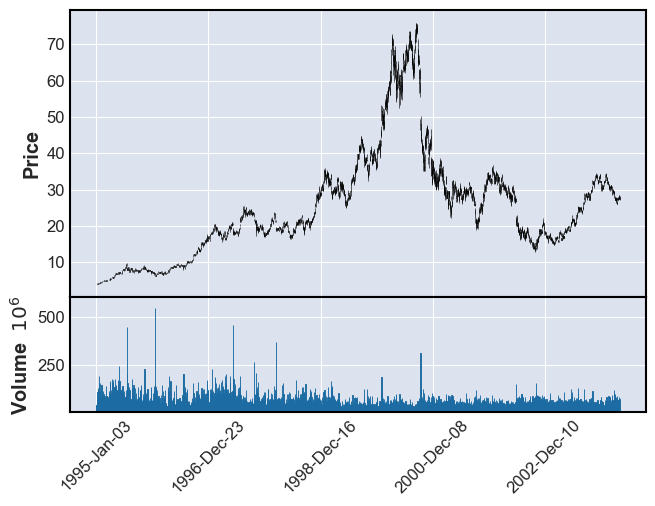

In [5]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True,type='candle')

In [6]:
aggregation = {'Open'  :'first',
               'High'  :'max',
               'Low'   :'min',
               'Close' :'last',
               'Volume':'sum'}
dfw = df.resample('1W').agg(aggregation)
dfm = df.resample('1M').agg(aggregation)
dfq = df.resample('1Q').agg(aggregation)

c:\Users\huzhe\.conda\envs\py310\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


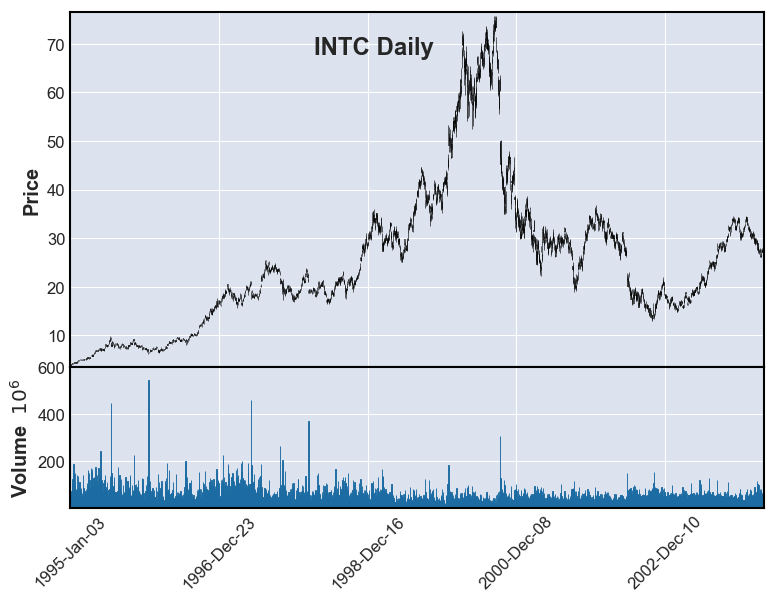

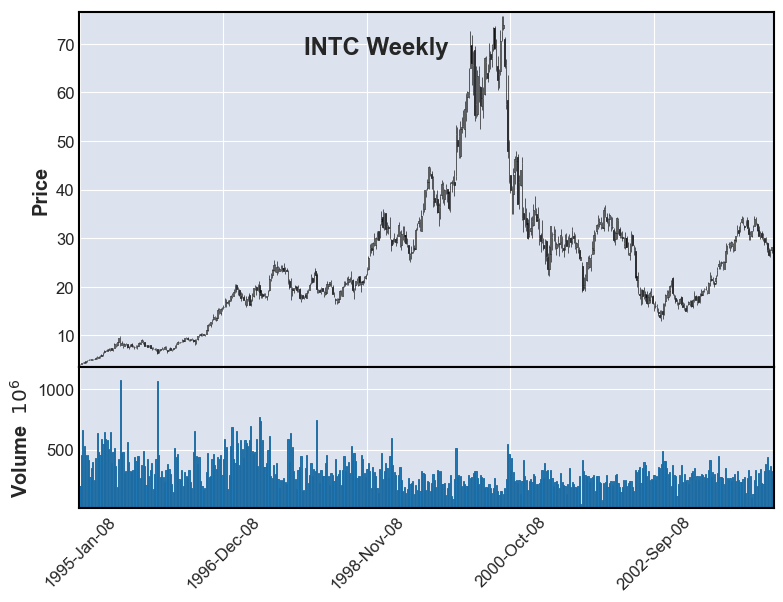

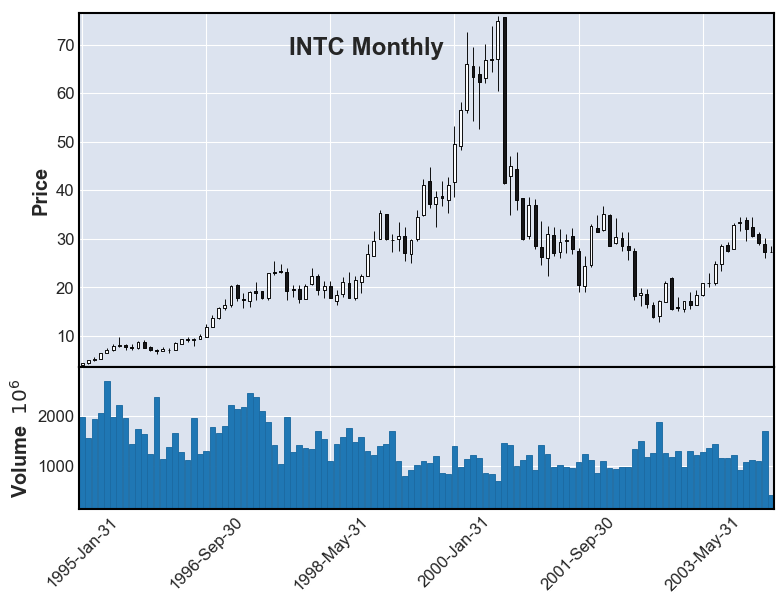

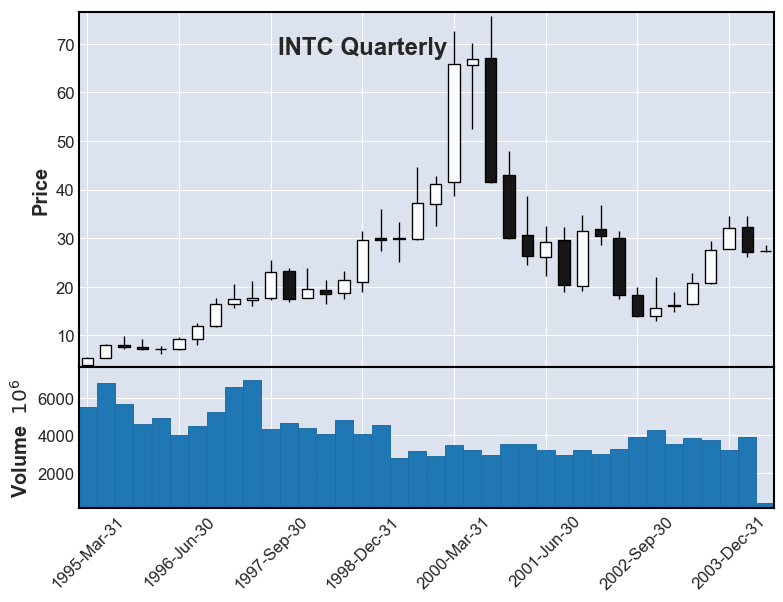

In [7]:
kwargs=dict(volume=True,type='candle',tight_layout=True)
mpf.plot(df,**kwargs,title='\nINTC Daily   ')
mpf.plot(dfw,**kwargs,title='\nINTC Weekly     ')
mpf.plot(dfm,**kwargs,title='\nINTC Monthly        ')
mpf.plot(dfq,**kwargs,title='\nINTC Quarterly         ')